In [52]:
import pickle
import numpy as np
import sys
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)


In [53]:
pickle_in = open("train_image.pkl","rb")
Train_data = pickle.load(pickle_in)
X_train = np.array(Train_data)

In [54]:
pickle_in = open("train_label.pkl","rb")
Train_labels = pickle.load(pickle_in)
Y_train = np.array(Train_labels)

In [65]:
pickle_in = open("test_image.pkl","rb")
Test_data = pickle.load(pickle_in)
X_test = np.array(Test_data)

In [66]:
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


In [75]:
feat_cols = [ 'pixel'+str(i) for i in range(X_train.shape[1]) ]

df = pd.DataFrame(X_train,columns=feat_cols)
df['label'] = Y_train
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print ('Size of the dataframe: {}'.format(df.shape))



# print (rndperm)

Size of the dataframe: (8000, 785)


<Figure size 432x288 with 0 Axes>

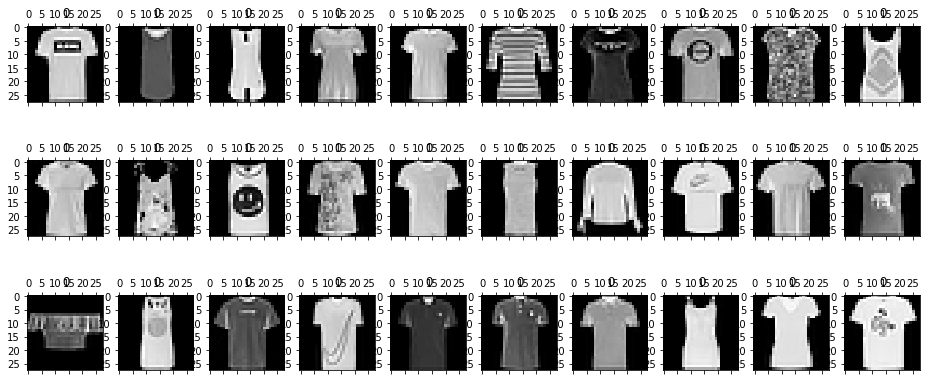

In [71]:
## Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=' ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()